# 네이버 영화 데이터 평점순 (21-05-03 기준)

In [1]:
import requests
from bs4 import BeautifulSoup as bs

In [2]:
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20210503'

```{admonition} Question 1
**네이버 영화 평점 순위의 랭킹사이트의 데이터를 requests를 이용하여 가져오고 parsing 하여 soup 변수에 저장하라**
```

In [3]:
data = requests.get(url)

In [4]:
soup = bs(data.text)

In [37]:
import numpy as np
import matplotlib.pyplot as plt

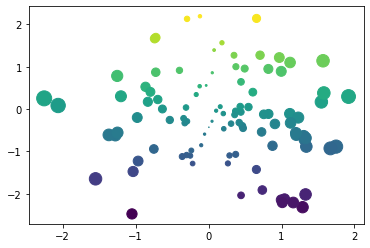

In [38]:
# This cell should have its output hidden!
data = np.random.randn(2, 100)
fig, ax = plt.subplots()
ax.scatter(*data, c=data[1], s=100*np.abs(data[0]));

In [33]:
soup.head()[:5]

[<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>,
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>,
 <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image"/>,
 <meta content="네이버영화 " property="me2:post_tag"/>,
 <meta content="네이버영화" property="me2:category1"/>]

In [34]:
soup

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image"/>
<meta content="네이버영화 " property="me2:post_tag"/>
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20210503" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [7]:
# print(soup.prettify()) -> 구조 골격 지켜가며 출력

In [8]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image"/>
  <meta content="네이버영화 " property="me2:post_tag"/>
  <meta content="네이버영화" property="me2:category1"/>
  <meta content="" property="me2:category2"/>
  <meta content="랭킹 : 네이버 영화" property="og:title"/>
  <meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
  <meta content="article" property="og:type"/>
  <meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20210503" property="og:url"/>
  <meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/>
  <!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
  <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
  <meta content="네이버 영화" p

```{admonition} Question 2
**메타정보에 관한 모든 파싱값을 meta 변수에 저장하라**
```

In [9]:
meta = soup.find_all('meta')

In [10]:
meta

[<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>,
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>,
 <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image"/>,
 <meta content="네이버영화 " property="me2:post_tag"/>,
 <meta content="네이버영화" property="me2:category1"/>,
 <meta content="" property="me2:category2"/>,
 <meta content="랭킹 : 네이버 영화" property="og:title"/>,
 <meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>,
 <meta content="article" property="og:type"/>,
 <meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20210503" property="og:url"/>,
 <meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/>,
 <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>,
 <meta content="네이버 영화" property="og:article:author"/>,
 <meta content="https://movie.naver.com/" property="og:article:author:ur

```{admonition} Question 3
**랭킹테이블의 모든파싱데이터를 가져와서 lstRanking 변수에 저장하라 ( <table cellspacing="0" class="list_ranking"> )**
```

In [11]:
lstRanking = soup.find(class_="list_ranking")

In [12]:
lstRanking.find(class_='blind')

<caption class="blind">랭킹 테이블</caption>

In [13]:
lstRanking

<table cellspacing="0" class="list_ranking">
<caption class="blind">랭킹 테이블</caption>
<col width="6%"/><col width="*"/><col width="15%"/><col width="3%"/><col width="12%"/><col width="2%"/><col width="5%"/>
<thead>
<tr>
<th scope="col">순위</th>
<th scope="col">영화명</th>
<th colspan="3" scope="col">평점</th>
<th colspan="2" scope="col">변동폭</th>
</tr>
</thead>
<tbody>
<tr><td class="blank01" colspan="8"></td></tr>
<!-- 예제
				<tr>
					<td class="ac"><img src="https://ssl.pstatic.net/imgmovie/2007/img/common/bullet_r_g50.gif" alt="50" width="14" height="13"></td>
					<td class="title"><a href="#">트랜스포머</a></td>
					<td class="ac"><img src="https://ssl.pstatic.net/imgmovie/2007/img/common/icon_down_1.gif" alt="down" width="7" height="10"></td>
					<td class="range ac">7</td>
				</tr>
				-->
<tr>
<td class="ac"><img alt="01" height="13" src="https://ssl.pstatic.net/imgmovie/2007/img/common/bullet_r_r01.gif" width="14"/></td>
<td class="title">
<div class="tit5">
<a href="/movie/bi/mi/basic

```{admonition} Question 4
**lstRanking에서 모든 영화의 순위, 이름, 평점, 영화정보링크를 가져와서 데이터프레임을 만들고 movieTable 변수에 저장하라**
```

In [14]:
title= [x.text.strip() for x in lstRanking.find_all('div',class_='tit5')]
point =[x.text for x in lstRanking.find_all('td',class_='point')]
rank = range(1,len(point)+1)
link = ['https://movie.naver.com' + x.a.get('href') for x in lstRanking.find_all('div',class_='tit5')]

In [15]:
import pandas as pd

In [16]:
movieTable = pd.DataFrame({'rank':rank,'title':title,'point':point,'link':link})

In [17]:
movieTable.head(5)

,rank,title,point,link
0,1,레옹,9.37,https://movie.naver.com/movie/bi/mi/basic.nhn?...
1,2,다시 태어나도 우리,9.35,https://movie.naver.com/movie/bi/mi/basic.nhn?...
2,3,피아니스트,9.33,https://movie.naver.com/movie/bi/mi/basic.nhn?...
3,4,"미안해요, 리키",9.32,https://movie.naver.com/movie/bi/mi/basic.nhn?...
4,5,부활: 그 증거,9.31,https://movie.naver.com/movie/bi/mi/basic.nhn?...


```{admonition} Question 5
**movieTable에 date 컬럼을 추가하여 2021-05-03 을 입력하라**
```

In [18]:
movieTable['date'] =pd.to_datetime('2021-05-03')

In [19]:
movieTable.head()

,rank,title,point,link,date
0,1,레옹,9.37,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2021-05-03
1,2,다시 태어나도 우리,9.35,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2021-05-03
2,3,피아니스트,9.33,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2021-05-03
3,4,"미안해요, 리키",9.32,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2021-05-03
4,5,부활: 그 증거,9.31,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2021-05-03


```{admonition} Question 5
**21년 4월 1일 부터 4월 30일까지 일자별 리스트를 생성하여 하나의 데이터 프레임(변수명 total)에 저장하라. 날짜는 date컬럼에 생성한다.**
```

In [20]:
#위의 과정을 하나의 함수로 생성한다
def get_movieDataEachDays(day):
    
    
    if day<10:
        day = '0'+str(day)
    else:
        day =str(day)
        
        
    base_url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=202104' +day
    data = requests.get(base_url)
    soup = bs(data.text)
    lstRanking = soup.find(class_="list_ranking")

    title= [x.text.strip() for x in lstRanking.find_all('div',class_='tit5')]
    point =[x.text for x in lstRanking.find_all('td',class_='point')]
    rank = range(1,len(point)+1)
    link = ['https://movie.naver.com' + x.a.get('href') for x in lstRanking.find_all('div',class_='tit5')]
    
    movieTable = pd.DataFrame({'rank':rank,'title':title,'point':point,'link':link})
    movieTable['date'] =pd.to_datetime('2021-04-'+day)
    return movieTable

In [21]:
#날짜별 데이터프레임을 생성하고 최종적으로 하나의 데이터 프레임을 생성
dfLst=[]


for day in range(1,31):
    df = get_movieDataEachDays(day)
    dfLst.append(df)

In [22]:
total = pd.concat(dfLst).reset_index(drop=True)

In [23]:
total.head()

,rank,title,point,link,date
0,1,극장판 바이올렛 에버가든,9.48,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2021-04-01
1,2,가나의 혼인잔치: 언약,9.42,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2021-04-01
2,3,반지의 제왕: 왕의 귀환,9.38,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2021-04-01
3,4,죽은 시인의 사회,9.38,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2021-04-01
4,5,반지의 제왕: 두 개의 탑,9.36,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2021-04-01


In [24]:
total.tail()

,rank,title,point,link,date
1495,46,팅커 테일러 솔저 스파이,8.21,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2021-04-30
1496,47,테넷,8.17,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2021-04-30
1497,48,문라이즈 킹덤,8.11,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2021-04-30
1498,49,날씨의 아이,7.95,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2021-04-30
1499,50,비와 당신의 이야기,7.93,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2021-04-30


```{admonition} Question 6
**total 데이터에서 일자별 3위 rank의 데이터를 rankThree 변수에 저장하라**
```

In [25]:
rankThree = total.loc[total['rank']==3].reset_index(drop=True)

In [26]:
rankThree.head(5)

,rank,title,point,link,date
0,3,반지의 제왕: 왕의 귀환,9.38,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2021-04-01
1,3,소년시절의 너,9.39,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2021-04-02
2,3,소년시절의 너,9.39,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2021-04-03
3,3,소년시절의 너,9.39,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2021-04-04
4,3,반지의 제왕: 왕의 귀환,9.38,https://movie.naver.com/movie/bi/mi/basic.nhn?...,2021-04-05


```{admonition} Question 7
**해당기간동안 랭킹 1위 영화들의 그 횟수를 구하여라**
```

In [27]:
count = total.loc[total['rank']==1]['title'].value_counts().to_frame().rename(columns={'title':'counts'})

In [28]:
count

,counts
극장판 바이올렛 에버가든,22
부활: 그 증거,6
레옹,2


```{admonition} Question 8
**데이터를 재구성하여 일자별 랭킹의 영화 제목을 출력하라**
```

In [29]:
rebuild = total.pivot(columns='date',index='rank',values='title')

In [30]:
pd.set_option('display.max_columns',40)

In [31]:
rebuild.head(5)

date,2021-04-01,2021-04-02,2021-04-03,2021-04-04,2021-04-05,2021-04-06,2021-04-07,2021-04-08,2021-04-09,2021-04-10,2021-04-11,2021-04-12,2021-04-13,2021-04-14,2021-04-15,2021-04-16,2021-04-17,2021-04-18,2021-04-19,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30
rank,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,극장판 바이올렛 에버가든,극장판 바이올렛 에버가든,극장판 바이올렛 에버가든,극장판 바이올렛 에버가든,극장판 바이올렛 에버가든,극장판 바이올렛 에버가든,극장판 바이올렛 에버가든,극장판 바이올렛 에버가든,극장판 바이올렛 에버가든,극장판 바이올렛 에버가든,극장판 바이올렛 에버가든,극장판 바이올렛 에버가든,극장판 바이올렛 에버가든,극장판 바이올렛 에버가든,부활: 그 증거,부활: 그 증거,부활: 그 증거,부활: 그 증거,부활: 그 증거,부활: 그 증거,극장판 바이올렛 에버가든,극장판 바이올렛 에버가든,극장판 바이올렛 에버가든,극장판 바이올렛 에버가든,극장판 바이올렛 에버가든,레옹,레옹,극장판 바이올렛 에버가든,극장판 바이올렛 에버가든,극장판 바이올렛 에버가든
2,가나의 혼인잔치: 언약,가나의 혼인잔치: 언약,가나의 혼인잔치: 언약,가나의 혼인잔치: 언약,가나의 혼인잔치: 언약,가나의 혼인잔치: 언약,가나의 혼인잔치: 언약,가나의 혼인잔치: 언약,가나의 혼인잔치: 언약,가나의 혼인잔치: 언약,가나의 혼인잔치: 언약,가나의 혼인잔치: 언약,가나의 혼인잔치: 언약,반지의 제왕: 왕의 귀환,패왕별희 디 오리지널,패왕별희 디 오리지널,패왕별희 디 오리지널,패왕별희 디 오리지널,패왕별희 디 오리지널,패왕별희 디 오리지널,부활: 그 증거,부활: 그 증거,레옹,레옹,레옹,다시 태어나도 우리,다시 태어나도 우리,레옹,레옹,레옹
3,반지의 제왕: 왕의 귀환,소년시절의 너,소년시절의 너,소년시절의 너,반지의 제왕: 왕의 귀환,반지의 제왕: 왕의 귀환,반지의 제왕: 왕의 귀환,반지의 제왕: 왕의 귀환,반지의 제왕: 왕의 귀환,반지의 제왕: 왕의 귀환,반지의 제왕: 왕의 귀환,반지의 제왕: 왕의 귀환,반지의 제왕: 왕의 귀환,죽은 시인의 사회,극장판 귀멸의 칼날: 무한열차편,극장판 귀멸의 칼날: 무한열차편,극장판 귀멸의 칼날: 무한열차편,극장판 귀멸의 칼날: 무한열차편,극장판 귀멸의 칼날: 무한열차편,극장판 귀멸의 칼날: 무한열차편,패왕별희 디 오리지널,패왕별희 디 오리지널,부활: 그 증거,부활: 그 증거,부활: 그 증거,피아니스트,부활: 그 증거,다시 태어나도 우리,다시 태어나도 우리,다시 태어나도 우리
4,죽은 시인의 사회,반지의 제왕: 왕의 귀환,반지의 제왕: 왕의 귀환,반지의 제왕: 왕의 귀환,죽은 시인의 사회,죽은 시인의 사회,죽은 시인의 사회,죽은 시인의 사회,죽은 시인의 사회,죽은 시인의 사회,죽은 시인의 사회,죽은 시인의 사회,죽은 시인의 사회,반지의 제왕: 두 개의 탑,소울,소울,소울,소울,소울,소울,극장판 귀멸의 칼날: 무한열차편,극장판 귀멸의 칼날: 무한열차편,피아니스트,피아니스트,피아니스트,패왕별희 디 오리지널,피아니스트,부활: 그 증거,부활: 그 증거,부활: 그 증거
5,반지의 제왕: 두 개의 탑,죽은 시인의 사회,죽은 시인의 사회,죽은 시인의 사회,반지의 제왕: 두 개의 탑,반지의 제왕: 두 개의 탑,반지의 제왕: 두 개의 탑,반지의 제왕: 두 개의 탑,반지의 제왕: 두 개의 탑,반지의 제왕: 두 개의 탑,반지의 제왕: 두 개의 탑,반지의 제왕: 두 개의 탑,반지의 제왕: 두 개의 탑,패왕별희 디 오리지널,천녀유혼,천녀유혼,천녀유혼,천녀유혼,자산어보,자산어보,소울,소울,패왕별희 디 오리지널,패왕별희 디 오리지널,패왕별희 디 오리지널,극장판 귀멸의 칼날: 무한열차편,패왕별희 디 오리지널,피아니스트,피아니스트,피아니스트
